In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义一个全连接神经网络
class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # 输入层到隐藏层 1
        self.fc2 = nn.Linear(512, 256)      # 隐藏层 1 到隐藏层 2
        self.fc3 = nn.Linear(256, 10)       # 隐藏层 2 到输出层

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 将输入展平成一维向量
        x = F.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = F.relu(self.fc2(x))
        x = self.fc3(x)          # 输出层不使用激活函数（用于分类）
        return x

# 数据加载和预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 初始化模型、损失函数和优化器
model = FCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 训练模型
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 测试模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Using downloaded and verified file: ./data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\MNIST\raw\train-labels-idx1-ubyte.gz
Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\MNIST\raw\t10k-images-idx3-ubyte.gz
Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/5], Loss: 0.3873
Epoch [2/5], Loss: 0.1577
Epoch [3/5], Loss: 0.1109
Epoch [4/5], Loss: 0.0868
Epoch [5/5], Loss: 0.0690
Accuracy on test set: 97.29%


Epoch [100/500], Loss: 133.5256
Epoch [200/500], Loss: 57.0117
Epoch [300/500], Loss: 15.6918
Epoch [400/500], Loss: 5.0518
Epoch [500/500], Loss: 2.4084


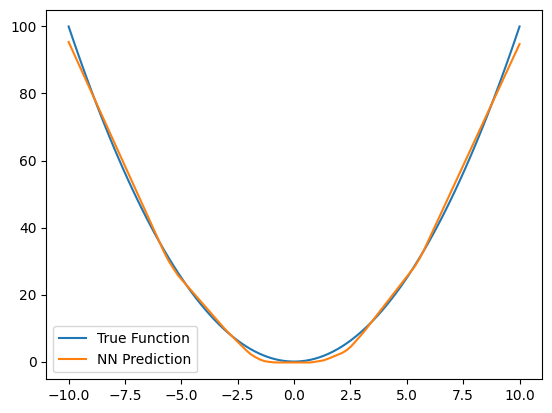

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成训练数据
def generate_data():
    x = torch.linspace(-10, 10, 100).view(-1, 1)
    y = x ** 2
    return x, y

# 定义一个简单的全连接神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 训练网络
def train_model(model, x_train, y_train, epochs=2000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 前向传播
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印损失
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 主函数
if __name__ == "__main__":
    # 生成数据
    x_train, y_train = generate_data()

    # 初始化模型
    model = SimpleNN()

    # 训练模型
    train_model(model, x_train, y_train, epochs=500, lr=0.01)

    # 测试模型
    model.eval()
    with torch.no_grad():
        y_pred = model(x_train)

    # 可视化结果
    plt.plot(x_train.numpy(), y_train.numpy(), label='True Function')
    plt.plot(x_train.numpy(), y_pred.numpy(), label='NN Prediction')
    plt.legend()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 生成训练数据
def generate_data():
    x = torch.linspace(-100, 100, 1000).view(-1, 1)
    y = x ** 2
    return x, y

# 定义一个简单的全连接神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 训练网络
def train_model(model, x_train, y_train, epochs=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 前向传播
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)

        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 打印损失
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# 主函数
if __name__ == "__main__":
    # 生成数据
    x_train, y_train = generate_data()

    # 初始化模型
    model = SimpleNN()

    # 训练模型
    train_model(model, x_train, y_train, epochs=1000, lr=0.001)

    # 测试模型
    model.eval()
    with torch.no_grad():
        y_pred = model(x_train)

    # 可视化结果
    plt.plot(x_train.numpy(), y_train.numpy(), label='True Function')
    plt.plot(x_train.numpy(), y_pred.numpy(), label='NN Prediction')
    plt.legend()
    plt.show()